<h1>Bienvenido al cuaderno para mostrar Sudokus</h1>
Este cuaderno Jupyter y el resto con los que vamos a trabajar con Sudokus nos van a ayudar a mostrar a tratar de resolverlos utilizando diferentes técnicas. El <b>objetivo</b> es comprender cómo podemos <b>diseñar un algoritmo</b> para resolver el Sudoku y luego poder comparar este algoritmo con otros tipos de estrategias.

<h2>Qué es un Sudoku</h2>
Un sudoku es una matriz 9x9 de números enteros del 1 al 9. Dentro de esta matriz 9x9 se hace una división de submatrices 3x3, que en este cuaderno vamos a llamar Tablero, y concretamente hay 9 tableros dentro de la matriz original del Sudoku. Es importante conocer estos tableros ya que se usan también para el cálculo de un <b>Sudoku bien resuelto</b>. 
<br><br>
En este juego se tienen en cuenta los siguientes elementos:
<ul>
    <li>Las 9 filas</li>
    <li>Las 9 columnas</li>
    <li>Los 9 tableros 3x3 que existen en el Sudoku</li>
    <li>Para las celdas vacías usaremos el 0 como número</li>
</ul>

In [1]:
# Importaciones necesarias para nuestro cuaderno
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
# Definir la matriz de Sudoku de ejemplo
sudoku = [
    [6, 1, 3, 7, 2, 8, 5, 4, 9],
    [2, 5, 7, 9, 4, 6, 8, 3, 1],
    [9, 8, 4, 1, 3, 5, 6, 7, 2],
    [5, 6, 1, 4, 7, 3, 9, 2, 8],
    [3, 7, 8, 2, 6, 9, 4, 1, 5],
    [4, 2, 9, 5, 8, 1, 7, 6, 3],
    [7, 4, 5, 8, 1, 2, 3, 9, 6],
    [1, 9, 6, 3, 5, 7, 2, 8, 4],
    [8, 3, 2, 6, 9, 4, 1, 5, 7]
]

# Tablero 1 del Sudoku anterior
tablero1 = [
    [6, 1, 3],
    [2, 5, 7],
    [9, 8, 4]
]

tablero9 = [
    [3, 9, 6],
    [2, 8, 4],
    [1, 5, 7]
]

# Mostrar el Sudoku de forma legible con saltos de línea
print("Sudoku")
print("------------------")
for fila in sudoku:
    print(fila)

# Mostrar el Tablero 1 de forma legible con saltos de línea
print("\nTablero 1")
print("------------------")
for fila in tablero1:
    print(fila)

# Mostrar el Tablero 9 de forma legible con saltos de línea
print("\nTablero 9")
print("------------------")
for fila in tablero9:
    print(fila)

Sudoku
------------------
[6, 1, 3, 7, 2, 8, 5, 4, 9]
[2, 5, 7, 9, 4, 6, 8, 3, 1]
[9, 8, 4, 1, 3, 5, 6, 7, 2]
[5, 6, 1, 4, 7, 3, 9, 2, 8]
[3, 7, 8, 2, 6, 9, 4, 1, 5]
[4, 2, 9, 5, 8, 1, 7, 6, 3]
[7, 4, 5, 8, 1, 2, 3, 9, 6]
[1, 9, 6, 3, 5, 7, 2, 8, 4]
[8, 3, 2, 6, 9, 4, 1, 5, 7]

Tablero 1
------------------
[6, 1, 3]
[2, 5, 7]
[9, 8, 4]

Tablero 9
------------------
[3, 9, 6]
[2, 8, 4]
[1, 5, 7]


<h2>Clases de nuestro Sudoku</h2>
Para comprender cómo vamos a trabajar con los Sudokus primero vamos a pensar cómo solemos hacerlos cuando trabajamos en bolígrafo y papel.

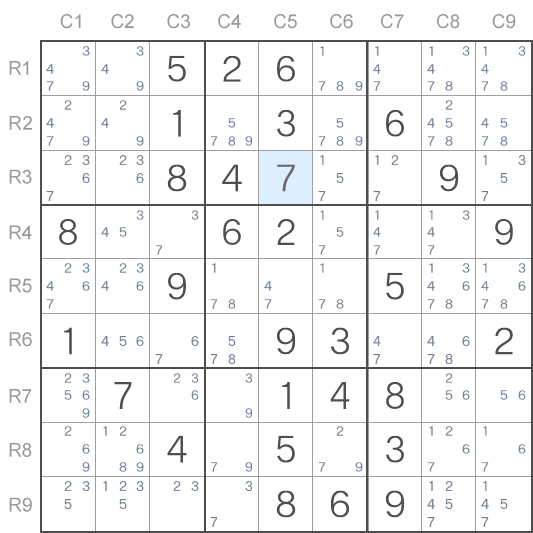

In [3]:
from IPython.display import Image

# Muestra la imagen local con una ruta absoluta
Image(filename='img/sudokuAnotacion.png')

Si nos fijamos el Sudoku base es una matriz 9x9 de números enteros del 1 al 9, con sólo eso podemos trabajar a nivel informático pero, como somos seres humanos, necesitamos hacer anotaciones y esa característica la vamos a incorporar en nuestra solución. Es por eso que el tablero de nuestro Sudoku será una matriz de 9x9 Celdas.

<h3>Clase Celda</h3>
La clase Celda tendrá los siguientes datos:
<ul>
    <li>Número que almacena: recuerda que pusimos 0 como convenio para indicar que la celda está vacía</li>
    <li>Anotaciones: un listado de números posibles para esa posición</li>
</ul>
Puedes ver el código de la clase Celda a continuación:

In [4]:
class Celda:
    def __init__(self, numero=0):
        self.numero = numero
        self.listado_de_anotaciones = set()

    def establecer_numero(self, numero):
        self.numero = numero
        self.listado_de_anotaciones.clear()

    def agregar_anotacion(self, anotacion):
        self.listado_de_anotaciones.add(anotacion)

    def eliminar_anotacion(self, anotacion):
        self.listado_de_anotaciones.discard(anotacion)

    def __repr__(self):
        return f"Celda(numero={self.numero}, listado_de_anotaciones={sorted(self.listado_de_anotaciones)})"

In [5]:
# Hacemos una prueba de la Celda
# Crear una nueva celda con el número 0 (vacía)
celda = Celda()

# Agregar anotaciones a la celda
celda.agregar_anotacion(1)
celda.agregar_anotacion(3)
celda.agregar_anotacion(5)

# Mostrar la celda
print(celda)  # Debería imprimir: Celda(numero=0, listado_de_anotaciones=[1, 3, 5])
# Establecer el número de la celda
celda.establecer_numero(7)
# Mostrar la celda después de establecer el número
print(celda)  # Debería imprimir: Celda(numero=7, listado_de_anotaciones=[])
# Intentar eliminar una anotación (no tendrá efecto porque la lista está vacía)
celda.eliminar_anotacion(3)
# Mostrar la celda después de intentar eliminar una anotación
print(celda)  # Debería imprimir: Celda(numero=7, listado_de_anotaciones=[])

Celda(numero=0, listado_de_anotaciones=[1, 3, 5])
Celda(numero=7, listado_de_anotaciones=[])
Celda(numero=7, listado_de_anotaciones=[])


<h3>Clase Tablero</h3>
La clase Tablero nos va a permitir trabajar con los 9 tableros que existen en un Sudoku. Sus atributos son:
<ul>
    <li>Una matriz de 3x3 celdas</li>
</ul>
Vamos a poder convertir el tablero en un conjunto para calcular si está resuelto o no. Puedes ver el código a continuación.

In [6]:
class Tablero:
    def __init__(self):
        self.matriz = [[Celda() for _ in range(3)] for _ in range(3)]
        # Crear el conjunto válido con los números del 1 al 9
        self.conjunto_valido = set(range(1, 10))

    def obtener_conjunto_numeros(self):
        conjunto_numeros = set()
        for fila in self.matriz:
            for celda in fila:
                if celda.numero != 0:
                    conjunto_numeros.add(celda.numero)
        return conjunto_numeros

    def esta_resuelto_tablero(self):
        conjunto_tablero = self.obtener_conjunto_numeros()
        return conjunto_tablero == self.conjunto_valido
    
    def __repr__(self):
        return '\n'.join([' '.join([str(celda.numero) for celda in fila]) for fila in self.matriz])

In [7]:
# Ejemplo de uso de un Tablero resuelto
tablero1 = Tablero()
tablero1.matriz[0][0].establecer_numero(1)
tablero1.matriz[0][1].establecer_numero(2)
tablero1.matriz[0][2].establecer_numero(3)
tablero1.matriz[1][0].establecer_numero(4)
tablero1.matriz[1][1].establecer_numero(5)
tablero1.matriz[1][2].establecer_numero(6)
tablero1.matriz[2][0].establecer_numero(7)
tablero1.matriz[2][1].establecer_numero(8)
tablero1.matriz[2][2].establecer_numero(9)

print("Tablero 1:")
print(tablero1)
print("\nConjunto de números en el Tablero 1:")
print(tablero1.obtener_conjunto_numeros())
print("\n¿Está resuelto el Tablero 1?")
print(tablero1.esta_resuelto_tablero())

# Ejemplo de uso de un Tablero resuelto
tablero2 = Tablero()
tablero2.matriz[0][0].establecer_numero(1)
tablero2.matriz[0][1].establecer_numero(2)
tablero2.matriz[0][2].establecer_numero(3)
tablero2.matriz[1][0].establecer_numero(0)
tablero2.matriz[1][1].establecer_numero(5)
tablero2.matriz[1][2].establecer_numero(6)
tablero2.matriz[2][0].establecer_numero(7)
tablero2.matriz[2][1].establecer_numero(8)
tablero2.matriz[2][2].establecer_numero(9)

print("\nTablero 2:")
print(tablero2)
print("\nConjunto de números en el Tablero 2:")
print(tablero2.obtener_conjunto_numeros())
print("\n¿Está resuelto el Tablero 2?")
print(tablero2.esta_resuelto_tablero())

Tablero 1:
1 2 3
4 5 6
7 8 9

Conjunto de números en el Tablero 1:
{1, 2, 3, 4, 5, 6, 7, 8, 9}

¿Está resuelto el Tablero 1?
True

Tablero 2:
1 2 3
0 5 6
7 8 9

Conjunto de números en el Tablero 2:
{1, 2, 3, 5, 6, 7, 8, 9}

¿Está resuelto el Tablero 2?
False


<h3>Clase Sudoku</h3>
Llegamos a la clase Sudoku que tendrá una matriz 9x9 de Celdas y los métodos para saber si una fila, columna o tablero está resuelto

In [8]:
class Sudoku:
    def __init__(self):
        self.matriz = [[Celda() for _ in range(9)] for _ in range(9)]

    def obtener_conjunto_columna(self, n):
        return {self.matriz[i][n].numero for i in range(9) if self.matriz[i][n].numero != 0}

    def obtener_conjunto_fila(self, n):
        return {self.matriz[n][i].numero for i in range(9) if self.matriz[n][i].numero != 0}

    def obtener_conjunto_tablero(self, n):
        fila_inicio = (n // 3) * 3
        col_inicio = (n % 3) * 3
        return {self.matriz[fila_inicio + i][col_inicio + j].numero 
                for i in range(3) for j in range(3) if self.matriz[fila_inicio + i][col_inicio + j].numero != 0}

    def es_fila_resuelta(self, n):
        return self.obtener_conjunto_fila(n) == set(range(1, 10))

    def es_columna_resuelta(self, n):
        return self.obtener_conjunto_columna(n) == set(range(1, 10))

    def es_tablero_resuelto(self, n):
        return self.obtener_conjunto_tablero(n) == set(range(1, 10))

    def es_sudoku_resuelto(self):
        for i in range(9):
            if not self.es_fila_resuelta(i) or not self.es_columna_resuelta(i) or not self.es_tablero_resuelto(i):
                return False
        return True

    def dibujar_sudoku(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        for i in range(10):
            if i == 0 or i == 9:
                linewidth = 5  # Líneas exteriores más gruesas
            elif i % 3 == 0:
                linewidth = 2  # Líneas interiores que separan subtableros 3x3
            else:
                linewidth = 1  # Otras líneas
            ax.plot([i, i], [0, 9], color='black', linewidth=linewidth)
            ax.plot([0, 9], [i, i], color='black', linewidth=linewidth)

        for i in range(9):
            for j in range(9):
                celda = self.matriz[i][j]
                if celda.numero != 0:
                    ax.text(j + 0.5, 8.5 - i, str(celda.numero), fontsize=20, ha='center', va='center')
                else:
                    anotaciones = sorted(celda.listado_de_anotaciones)
                    for k, anotacion in enumerate(anotaciones):
                        ax.text(j + (k % 3) * 0.3 + 0.2, 8.8 - i - (k // 3) * 0.3, str(anotacion), fontsize=8, ha='center', va='center', color='darkblue')

        ax.set_xlim(0, 9)
        ax.set_ylim(0, 9)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()

    def __repr__(self):
        return '\n'.join([' '.join([str(celda.numero) if celda.numero != 0 else '.' for celda in fila]) for fila in self.matriz])

Sudoku 1:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9


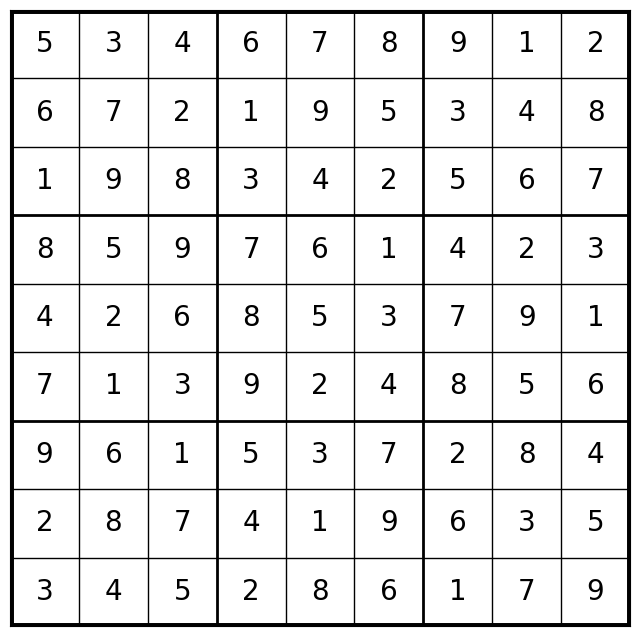


Conjunto de la fila 8:
{1, 2, 3, 4, 5, 6, 7, 8, 9}

Conjunto de la columna 2:
{1, 2, 3, 4, 5, 6, 7, 8, 9}

Conjunto del tablero 8:
{1, 2, 3, 4, 5, 6, 7, 8, 9}

¿Está la fila 8 resuelta?
True

¿Está la columna 2 resuelta?
True

¿Está el tablero 8 resuelto?
True

¿Está el Sudoku resuelto?
True


In [9]:
# Ejemplo de uso
sudoku1 = Sudoku()
# Configura algunos valores en el Sudoku (por ejemplo, un Sudoku resuelto para pruebas)
valores1 = [
    [5, 3, 4, 6, 7, 8, 9, 1, 2],
    [6, 7, 2, 1, 9, 5, 3, 4, 8],
    [1, 9, 8, 3, 4, 2, 5, 6, 7],
    [8, 5, 9, 7, 6, 1, 4, 2, 3],
    [4, 2, 6, 8, 5, 3, 7, 9, 1],
    [7, 1, 3, 9, 2, 4, 8, 5, 6],
    [9, 6, 1, 5, 3, 7, 2, 8, 4],
    [2, 8, 7, 4, 1, 9, 6, 3, 5],
    [3, 4, 5, 2, 8, 6, 1, 7, 9]
]

for i in range(9):
    for j in range(9):
        sudoku1.matriz[i][j].establecer_numero(valores1[i][j])

print("Sudoku 1:")
print(sudoku1)
sudoku1.dibujar_sudoku()
print("\nConjunto de la fila 8:")
print(sudoku1.obtener_conjunto_fila(8))
print("\nConjunto de la columna 2:")
print(sudoku1.obtener_conjunto_columna(2))
print("\nConjunto del tablero 8:")
print(sudoku1.obtener_conjunto_tablero(8))
print("\n¿Está la fila 8 resuelta?")
print(sudoku1.es_fila_resuelta(8))
print("\n¿Está la columna 2 resuelta?")
print(sudoku1.es_columna_resuelta(2))
print("\n¿Está el tablero 8 resuelto?")
print(sudoku1.es_tablero_resuelto(8))
print("\n¿Está el Sudoku resuelto?")
print(sudoku1.es_sudoku_resuelto())


Sudoku 2:
5 3 4 6 7 . 9 1 2
6 7 2 1 9 5 3 4 8
. 9 8 3 4 2 . 6 7
8 5 9 . 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 . 8 5 6
9 6 1 5 3 7 2 8 4
2 . 7 . 1 9 6 3 5
3 4 5 2 8 6 1 7 9


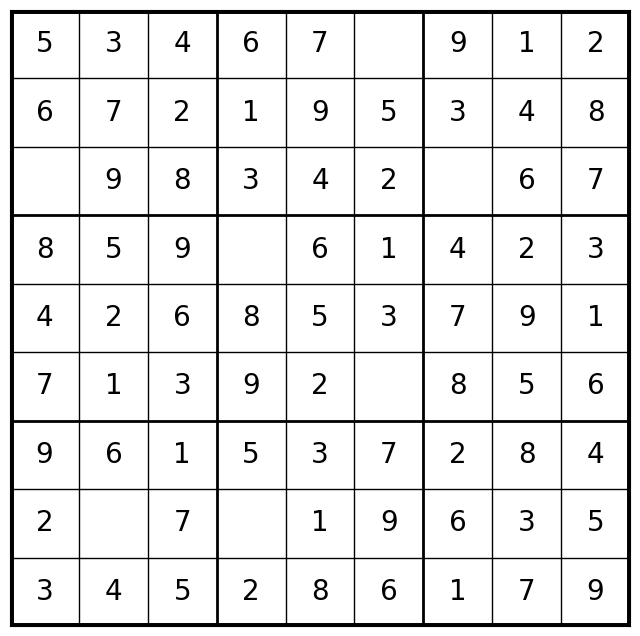


Conjunto de la fila 1:
{1, 2, 3, 4, 5, 6, 7, 8, 9}

Conjunto de la columna 5:
{1, 2, 3, 5, 6, 7, 9}

Conjunto del tablero 7:
{1, 2, 3, 5, 6, 7, 8, 9}

¿Está la fila 1 resuelta?
True

¿Está la columna 5 resuelta?
False

¿Está el tablero 7 resuelto?
False

¿Está el Sudoku resuelto?
False


In [10]:
# Ejemplo de uso
sudoku2 = Sudoku()
# Configura algunos valores en el Sudoku (por ejemplo, un Sudoku no resuelto para pruebas)
valores2 = [
    [5, 3, 4, 6, 7, 0, 9, 1, 2],
    [6, 7, 2, 1, 9, 5, 3, 4, 8],
    [0, 9, 8, 3, 4, 2, 0, 6, 7],
    [8, 5, 9, 0, 6, 1, 4, 2, 3],
    [4, 2, 6, 8, 5, 3, 7, 9, 1],
    [7, 1, 3, 9, 2, 0, 8, 5, 6],
    [9, 6, 1, 5, 3, 7, 2, 8, 4],
    [2, 0, 7, 0, 1, 9, 6, 3, 5],
    [3, 4, 5, 2, 8, 6, 1, 7, 9]
]

for i in range(9):
    for j in range(9):
        sudoku2.matriz[i][j].establecer_numero(valores2[i][j])

print("\nSudoku 2:")
print(sudoku2)
sudoku2.dibujar_sudoku()
print("\nConjunto de la fila 1:")
print(sudoku2.obtener_conjunto_fila(1))
print("\nConjunto de la columna 5:")
print(sudoku2.obtener_conjunto_columna(5))
print("\nConjunto del tablero 7:")
print(sudoku2.obtener_conjunto_tablero(7))
print("\n¿Está la fila 1 resuelta?")
print(sudoku2.es_fila_resuelta(1))
print("\n¿Está la columna 5 resuelta?")
print(sudoku2.es_columna_resuelta(5))
print("\n¿Está el tablero 7 resuelto?")
print(sudoku2.es_tablero_resuelto(7))
print("\n¿Está el Sudoku resuelto?")
print(sudoku2.es_sudoku_resuelto())


Sudoku 3:
5 3 . 6 . . . 9 8
. 7 . 1 9 5 . . .
. . . . . . . 6 .
8 . . 4 . . 7 . .
. 6 . 8 . 3 . 2 .
. . 3 . . 1 . . 6
. 6 . . . . 2 8 .
4 . . 5 . . . 1 .
7 . . . 2 . . . .


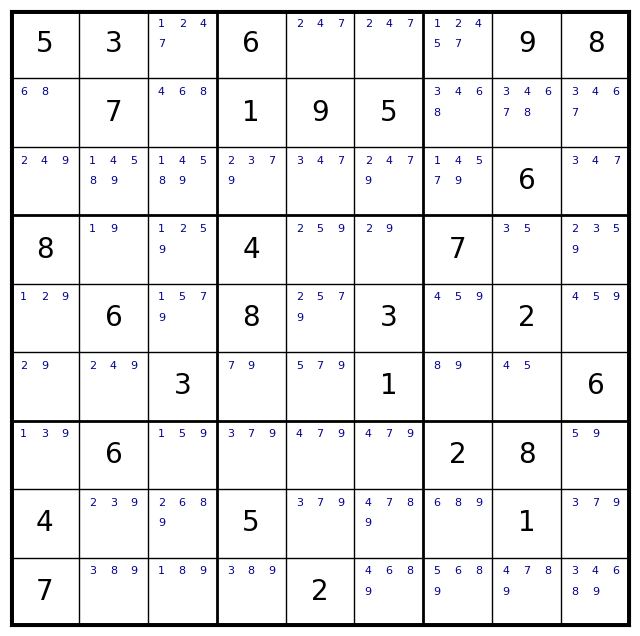

In [11]:
# Ejemplo de uso para ver un Sudoku con sus anotaciones
sudoku3 = Sudoku()
# Configura algunos valores en el Sudoku y sus anotaciones
valores3 = [
    [5, 3, 0, 6, 0, 0, 0, 9, 8],
    [0, 7, 0, 1, 9, 5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 4, 0, 0, 7, 0, 0],
    [0, 6, 0, 8, 0, 3, 0, 2, 0],
    [0, 0, 3, 0, 0, 1, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [4, 0, 0, 5, 0, 0, 0, 1, 0],
    [7, 0, 0, 0, 2, 0, 0, 0, 0]
]

anotaciones3 = [
    [[], [], [1, 2, 4, 7], [], [2, 4, 7], [2, 4, 7], [1, 2, 4, 5, 7], [], []],
    [[6, 8], [], [4, 6, 8], [], [], [], [3, 4, 6, 8], [3, 4, 6, 7, 8], [3, 4, 6, 7]],
    [[2, 4, 9], [1, 4, 5, 8, 9], [1, 4, 5, 8, 9], [2, 3, 7, 9], [3, 4, 7], [2, 4, 7, 9], [1, 4, 5, 7, 9], [], [3, 4, 7]],
    [[], [1, 9], [1, 2, 5, 9], [], [2, 5, 9], [2, 9], [], [3, 5], [2, 3, 5, 9]],
    [[1, 2, 9], [], [1, 5, 7, 9], [], [2, 5, 7, 9], [], [4, 5, 9], [], [4, 5, 9]],
    [[2, 9], [2, 4, 9], [], [7, 9], [5, 7, 9], [], [8, 9], [4, 5], []],
    [[1, 3, 9], [], [1, 5, 9], [3, 7, 9], [4, 7, 9], [4, 7, 9], [], [], [5, 9]],
    [[], [2, 3, 9], [2, 6, 8, 9], [], [3, 7, 9], [4, 7, 8, 9], [6, 8, 9], [], [3, 7, 9]],
    [[], [3, 8, 9], [1, 8, 9], [3, 8, 9], [], [4, 6, 8, 9], [5, 6, 8, 9], [4, 7, 8, 9], [3, 4, 6, 8, 9]]
]

for i in range(9):
    for j in range(9):
        sudoku3.matriz[i][j].establecer_numero(valores3[i][j])
        for anotacion in anotaciones3[i][j]:
            sudoku3.matriz[i][j].agregar_anotacion(anotacion)

print("\nSudoku 3:")
print(sudoku3)
sudoku3.dibujar_sudoku()

Con el código de este cuaderno ya podemos representar nuestro Sudoku y trabajar con él para resolverlo.

<h3>Clase Pintar Sudoku</h3>
Con esta clase vamos a poder utilizar unas opciones para pintar los siguientes elementos del Sudoku:
<ul>
    <li>Pintar el sudoku marcando con un color una fila</li>
    <li>Pintar el sudoku marcando con un color una columna</li>
    <li>Pintar el sudoku marcando con un color un tablero</li>
    <li>Pintar el sudoku marcando con un color una posición de la matriz del sudoku con un tono más oscuro y el color indicado en la fila y columna de esa posición </li>
</ul>

In [64]:
class PintarSudoku:
    def __init__(self, sudoku):
        self.sudoku = sudoku

    def dibujar_sudoku(self, color_celda='white', fila=-1, columna=-1, tablero=-1, pos=None, color_fila='lightgrey', color_columna='lightgrey', color_tablero='lightgrey', color_pos='darkgrey'):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(0, 9)
        ax.set_ylim(0, 9)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.gca().invert_yaxis()

        # Pintar todas las celdas
        for i in range(9):
            for j in range(9):
                ax.add_patch(plt.Rectangle((j, 8 - i), 1, 1, color=color_celda, zorder=0))

        # Pintar la fila
        if fila >= 0:
            ax.add_patch(plt.Rectangle((0, fila), 9, 1, color=color_fila, zorder=0))

        # Pintar la columna
        if columna >= 0:
            ax.add_patch(plt.Rectangle((columna, 0), 1, 9, color=color_columna, zorder=0))

        # Pintar el tablero 3x3
        if tablero >= 0:
            fila_inicio = (tablero // 3) * 3
            col_inicio = (tablero % 3) * 3
            ax.add_patch(plt.Rectangle((col_inicio, 8 - fila_inicio - 2), 3, 3, color=color_tablero, zorder=0))

        # Pintar la posición específica
        if pos is not None:
            i, j = pos
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_pos, zorder=2))

        # Dibujar la cuadrícula
        for i in range(10):
            linewidth = 5 if i == 0 or i == 9 else 2 if i % 3 == 0 else 1
            ax.plot([i, i], [0, 9], color='black', linewidth=linewidth, zorder=1)
            ax.plot([0, 9], [i, i], color='black', linewidth=linewidth, zorder=1)

        # Dibujar los números y anotaciones
        for i in range(9):
            for j in range(9):
                celda = self.sudoku.matriz[i][j]
                if celda.numero != 0:
                    ax.text(j + 0.5, 8.5 - i, str(celda.numero), fontsize=20, ha='center', va='center', zorder=2)
                else:
                    anotaciones = sorted(celda.listado_de_anotaciones)
                    for k, anotacion in enumerate(anotaciones):
                        ax.text(j + (k % 3) * 0.3 + 0.2, 8.8 - i - (k // 3) * 0.3, str(anotacion), fontsize=8, ha='center', va='center', color='darkblue', zorder=2)

        plt.show()

    def pintar_fila(self, fila, color='lightgrey'):
        self.dibujar_sudoku(fila=fila, color_fila=color)

    def pintar_columna(self, columna, color='lightgrey'):
        self.dibujar_sudoku(columna=columna, color_columna=color)

    def pintar_tablero(self, tablero, color='lightgrey'):
        self.dibujar_sudoku(tablero=tablero, color_tablero=color)

    def pintar_posicion(self, fila, columna, color_fila='lightgrey', color_columna='lightgrey', color_pos='darkgrey'):
        self.dibujar_sudoku(fila=fila, columna=columna, pos=(fila, columna), color_fila=color_fila, color_columna=color_columna, color_pos=color_pos)

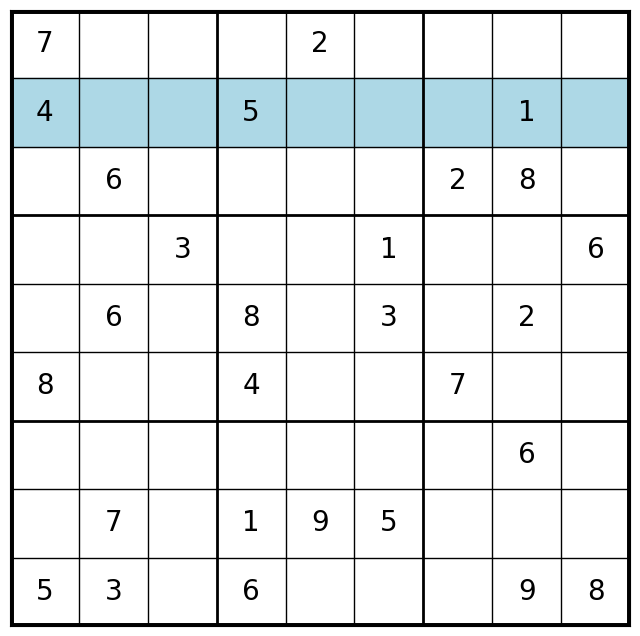

In [65]:
# Ejemplo de uso
sudoku4 = Sudoku()
valores4 = [
    [5, 3, 0, 6, 0, 0, 0, 9, 8],
    [0, 7, 0, 1, 9, 5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 4, 0, 0, 7, 0, 0],
    [0, 6, 0, 8, 0, 3, 0, 2, 0],
    [0, 0, 3, 0, 0, 1, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [4, 0, 0, 5, 0, 0, 0, 1, 0],
    [7, 0, 0, 0, 2, 0, 0, 0, 0]
]

for i in range(9):
    for j in range(9):
        sudoku4.matriz[i][j].establecer_numero(valores4[i][j])

pintar_sudoku = PintarSudoku(sudoku4)

# Pintar ejemplos
pintar_sudoku.pintar_fila(1, 'lightblue')

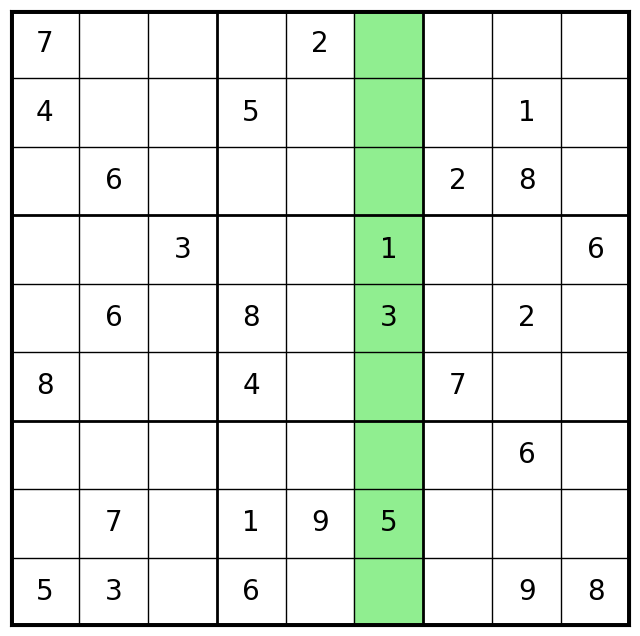

In [66]:
pintar_sudoku.pintar_columna(5, 'lightgreen')

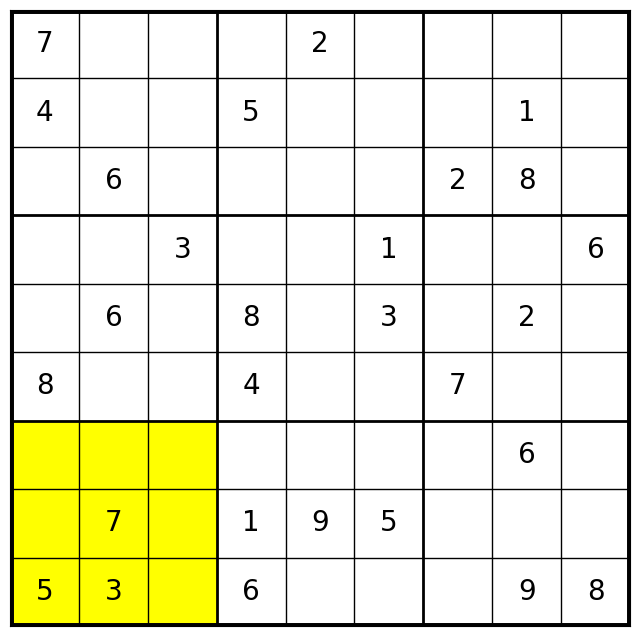

In [67]:
pintar_sudoku.pintar_tablero(0, 'yellow')
# Nota: los Tableros se numeran desde abajo hacia arriba

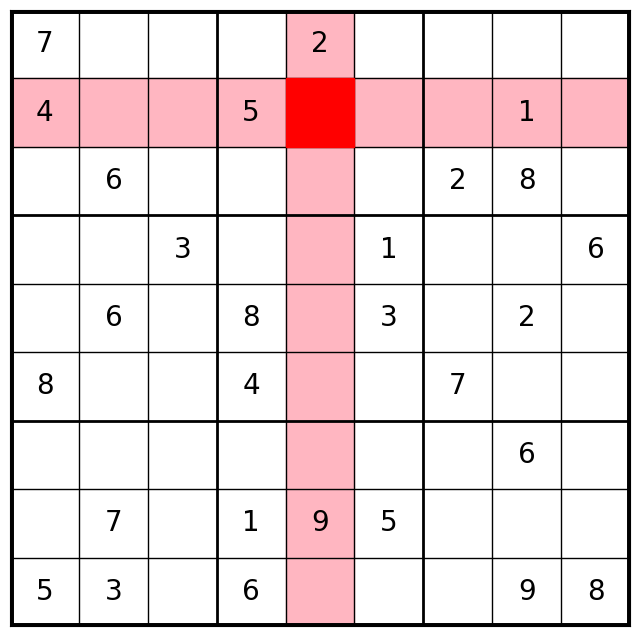

In [55]:
pintar_sudoku.pintar_posicion(1, 4, 'lightpink', 'lightpink', 'red')

<h3>Clase CargarSudoku</h3>
Para trabajar de forma más óptima y tener muchos más ejemplos vamos a crear una clase llamada CargarSudoku que va permitir poder cargar archivos con un Sudoku base dentro del fichero.

In [56]:
class CargarSudoku:
    def __init__(self, filepath):
        self.filepath = filepath

    def cargar(self):
        with open(self.filepath, 'r') as file:
            lines = file.readlines()
        
        sudoku = Sudoku()
        for i, line in enumerate(lines):
            valores = ast.literal_eval(line.strip())  # Utilizamos ast.literal_eval para evaluar la lista
            for j, valor in enumerate(valores):
                sudoku.matriz[i][j].establecer_numero(valor)
        
        return sudoku

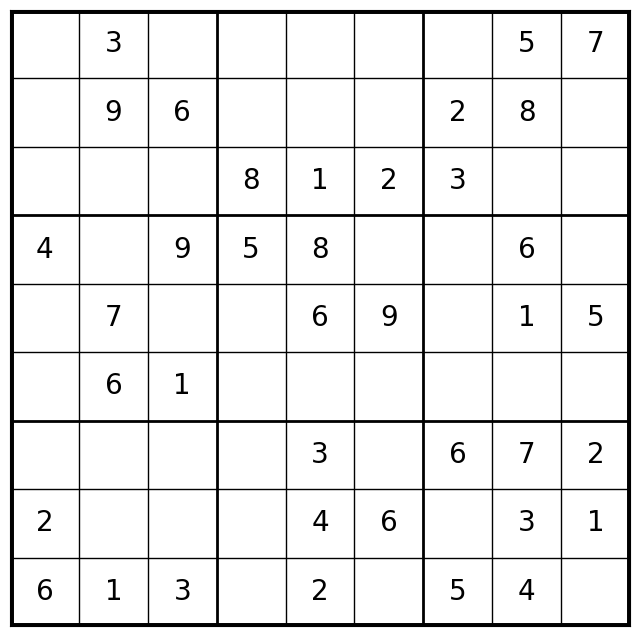

In [57]:
# Ejemplo de cargar ficheros
# sudoku_1.suk es un sudoku inicial con los números de un nivel fácil de una app móvil
filepath_1 = 'sudokus/sudoku_1.suk'
# sudoku_2.suk es la continuación del sudoku anterior completando algunos elementos
filepath_2 = 'sudokus/sudoku_2.suk'
# sudoku_3.suk es el mismo Sudoku anterior ya resuelto
filepath_3 = 'sudokus/sudoku_3.suk'

cargar_sudoku_1 = CargarSudoku(filepath_1)
sudoku_1 = cargar_sudoku_1.cargar()

cargar_sudoku_2 = CargarSudoku(filepath_2)
sudoku_2 = cargar_sudoku_2.cargar()

cargar_sudoku_3 = CargarSudoku(filepath_3)
sudoku_3 = cargar_sudoku_3.cargar()

# Pintar ejemplos de los Sudokus cargados
pintar_sudoku_1 = PintarSudoku(sudoku_1)
pintar_sudoku_1.dibujar_sudoku()

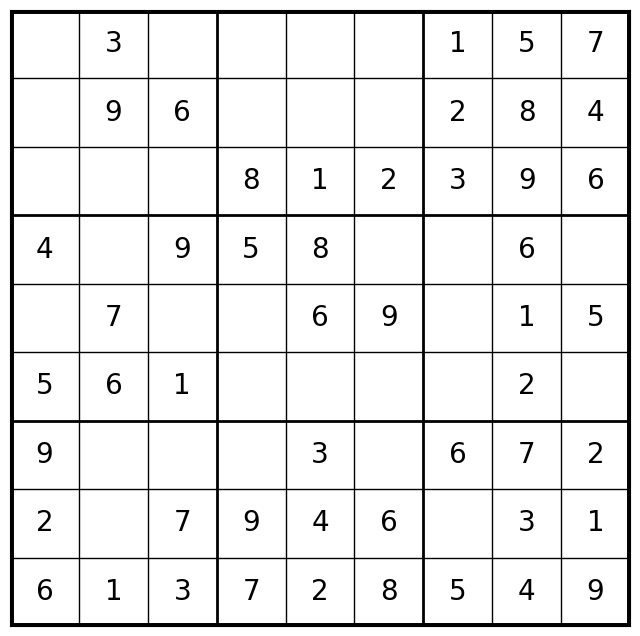

In [58]:
pintar_sudoku_2 = PintarSudoku(sudoku_2)
pintar_sudoku_2.dibujar_sudoku()

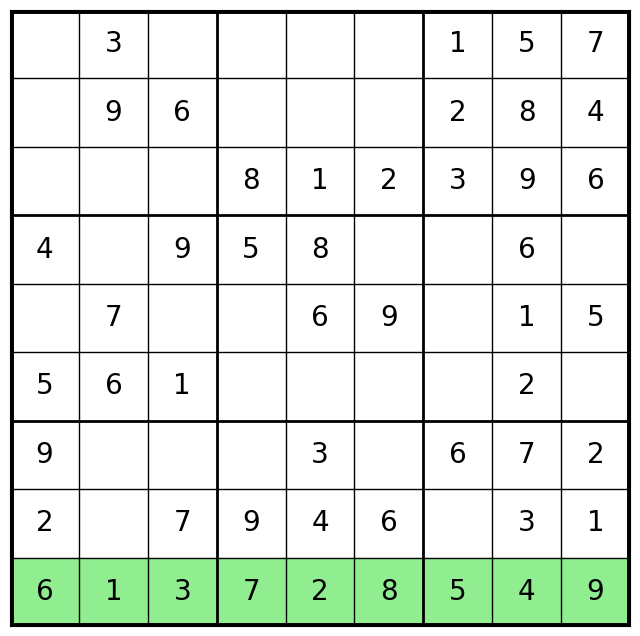

In [59]:
# En este Sudoku 2 tenemos resuelta la columna 8
pintar_sudoku_2.pintar_fila(8, 'lightgreen') 

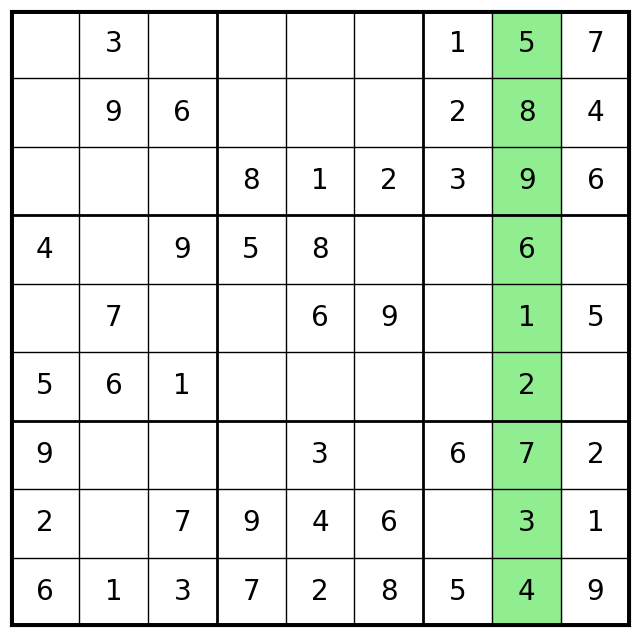

In [35]:
# En este Sudoku 2 tenemos resuelta la columna 7
pintar_sudoku_2.pintar_columna(7, 'lightgreen')

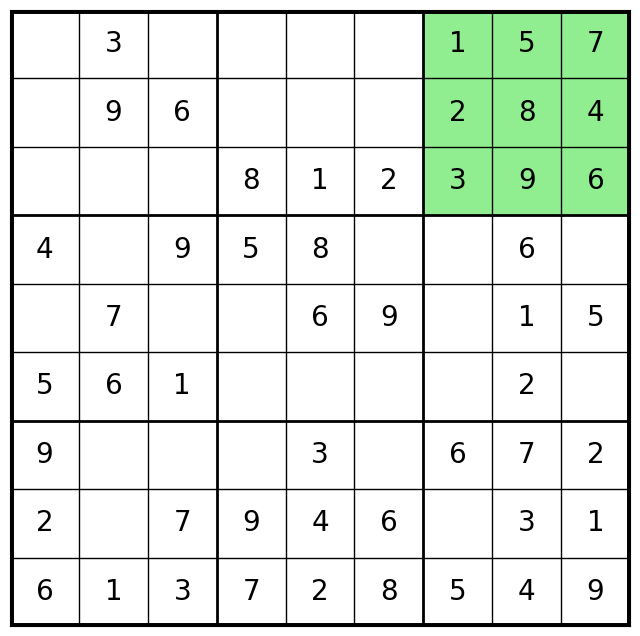

In [60]:
# En este Sudoku 2 tenemos resuelto el Tablero 8
pintar_sudoku_2.pintar_tablero(8, 'lightgreen')

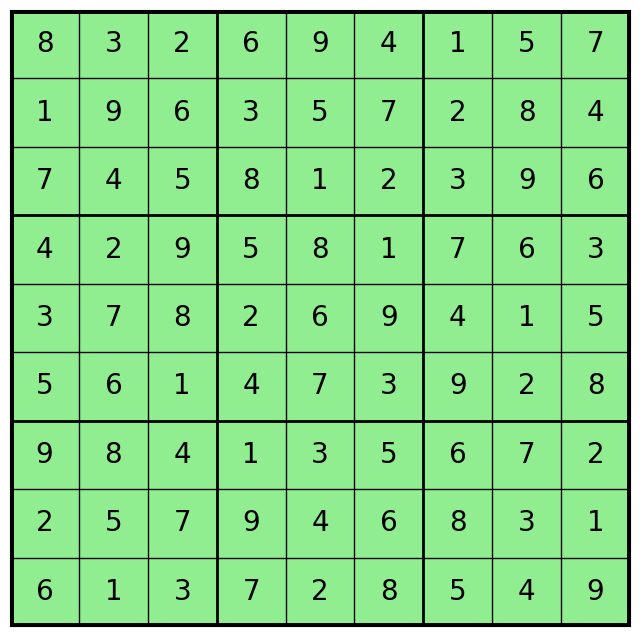

In [61]:
# Vemos en verde el tablero resuelto del Sudoku
pintar_sudoku_3 = PintarSudoku(sudoku_3)
pintar_sudoku_3.dibujar_sudoku(color_celda='lightgreen')